# Градиентный спуск. Практика

## Импорт библиотек, установка константных значений

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [167]:
RANDOM_STATE = 123
TRAIN_SIZE = 0.75

In [168]:
np.random.RandomState(RANDOM_STATE)

RandomState(MT19937) at 0x23630360140

In [169]:
np.random.seed(RANDOM_STATE)

X, y, _ = make_regression(n_samples=100000,              # число объектов
                          n_features=10,                 # число признаков
                          n_informative=8,               # число информативных признаков
                          noise=100,                     # уровень шума в данных
                          coef=True,                     # значение True используется при генерации данных
                          random_state=RANDOM_STATE)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01


Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле:

$$w = (X^TX)^{-1}X^Ty$$

Комментарий: для поиска решения в векторном виде сначала необходимо добавить единичный столбец к матрице $X$.
Это сделано в коде.

In [170]:
#аналитический подход
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

Заполните функцию для предсказания модели по формуле
$$a(X)=Xw$$

In [171]:
def prediction(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    ypred = X @ w
    return ypred

Продублируем функцию для вычисления значения MSE из урока

In [172]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

Скопируйте метод градиентного спуска из [урока](https://colab.research.google.com/drive/1Bos0LeQP9AAB-nrS0z8b-8ag5xRSEdty?usp=sharing) в этот ноутбук.


In [173]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params


### Бонус для отважных

Если чувствуете в себе силы, попробуйте написать SGD сами.

Модифицируйте метод градиентного спуска из урока так, чтобы это теперь был метод стохастического градиентного спуска:

* на каждой итерации выбирайте один случайный индекс `j` при помощи функции `random.randint`

* градиент на каждой итерации градиентного спуска считайте не как сумму градиентов по всем объектам, а только по одному объекту с индексом `j`

* на каждой итерации вычисляйте значение функции потерь и сохраняйте в список `cost_track`, который верните вместе с результатом работы функции

In [174]:
import random

def stochastic_gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    m = X.shape[0]
    cost_track = np.zeros((iterations,1))
    
    for i in range(iterations):
        ind = np.random.randint(0, m)
        gradient = 2./m * learning_rate * (X[ind].T * ((X[ind] @ params) - y[ind]))  # вычисляем градиент по одному объекту
        params -= gradient 
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

- Обучите линейную регрессию тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии ($X, y$). Для GD и самостоятельно написанного SGD используйте `learning_rate = 0.01, iterations = 10000`.

*P.S. Если же вы используете не самописный SGD, а SGDRegressor из библиотеки sklearn.linear_model, то его объявляйте с гиперпараметрами по умолчанию, то есть в скобках при объявлении модели ничего не указывайте.*

- С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (`from sklearn.metrics import r2_score`). Для получения предсказания использовуйте функцию `predict`.


In [175]:
# **План**

# 1 - находим веса одним из методов

# 2 - применяем функцию prediction для получения предсказаний с найденными весами (либо predict в случае использования SGDRegressor из библиотеки sklearn)

# 3 - вычисляем значение метрики r2

## Quiz

Чему равно значение метрики $R^2$ для аналитического подхода?

Ответ округлите до сотых.

In [176]:
from sklearn.metrics import r2_score

In [177]:
%%time
w = ols_solution(X, y)
ypred = prediction(X, w)
print(f'R2 для аналитического подхода {r2_score(y, ypred).round(2)}')


R2 для аналитического подхода 0.75
CPU times: total: 62.5 ms
Wall time: 36.1 ms


In [178]:
%%time
cost_track, params = gradient_descent(X, y, learning_rate = 0.01, iterations = 10000)
ypred_grad = prediction(X, params)
print(f'R2 для градиентного спуска {r2_score(y, ypred_grad).round(2)}')


R2 для градиентного спуска 0.76
CPU times: total: 2min 37s
Wall time: 23.7 s


In [179]:
%%time
cost_track, params = stochastic_gradient_descent(X, y, learning_rate = 0.01, iterations = 10000)
ypred_SGD = prediction(X, params)
print(f'R2 для стохастического градиентного спуска {r2_score(y, ypred_SGD).round(2)}')


R2 для стохастического градиентного спуска 0.03
CPU times: total: 1min 2s
Wall time: 9.35 s


In [180]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X, y)
ypred_sgd_scikit = sgd.predict(X)
print(f'R2 для стохастического градиентного спуска scikit {r2_score(y, ypred_sgd_scikit).round(2)}')

R2 для стохастического градиентного спуска scikit 0.76


## Quiz

Нарисуйте траекторию уменьшения ошибки при обучении градиентного спуска (это параметр `cost_track`, возвращаемый функцией).

Чему приблизительно равен loss модели на последних итерациях?

Выберите наиболее близкий к полученному вами ответ.

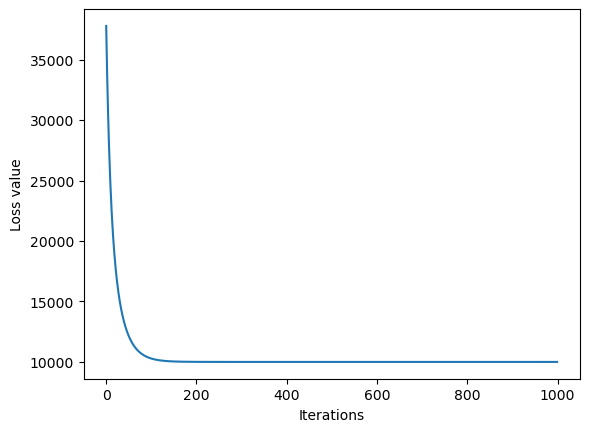

In [181]:
cost_track, params = gradient_descent(X, y, learning_rate=0.01, iterations= 1000)
plt.plot(cost_track)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## Quiz

Измерьте время работы аналитического подхода, а также GD и SGD (используйте magic command [`%%time`](https://ipython.readthedocs.io/en/stable/interactive/magics.html)).

Упорядочите результаты по возрастанию.

## Тестирование моделей на реальных данных

В реальных задачах никто не пишет методы с нуля, если они уже реализованы в python. Самостоятельная реализация методов полезна для получения навыков программирования и более глубокого понимания алгоритмов.

Давайте применим уже готовые методы из `sklearn` для решения задачи регрессии.

In [182]:
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

Разобъем данные на трейн и тест

In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE
    )

Для решения этой задачи попробуйте следующие модели:

* `LinearRegression` из `sklearn`
* `SGDRegressor` из `sklearn`

Обучите модели на тренировочных данных с параметрами по умолчанию и сделайте предсказание на тесте.
Вычислите значение $R^2$

Чему равно значение $R^2$ для модели LinearRegression на тестовых данных?

Ответ округлите до сотых.

In [184]:
from sklearn.linear_model import LinearRegression, SGDRegressor
lr, sgd = LinearRegression(), SGDRegressor()

lr.fit(X_train, y_train)
sgd.fit(X_train, y_train)

ypred_lr, ypred_sgd = lr.predict(X_test), sgd.predict(X_test)

print(f'R2 LinearRegression: {r2_score(y_test, ypred_lr)}')
print(f'R2 SGDRegression: {r2_score(y_test, ypred_sgd)}')

R2 LinearRegression: 0.6078944086580228
R2 SGDRegression: -5.71465456768513e+28


## Quiz

Какая модель с параметрами по умолчанию лучше справилась с предсказанием стоимости домов в Калифорнии?

**Ответ:** LinearRegression

## Quiz

Проинтерпретируйте качество метода SGDRegressor. Выберите наиболее подходящий вариант.

**Ответ:** R2 отрицательный и большой - метод расходится (не находит минимум функции потерь)